# Project: Data Analysis for eBay Car Sales in Germany

# Normal way of conducting eda analysis (Sample analysis)

# Reference for Hackethon, ML



## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
</ul>

## With respect to ML predictive modelling, EDA is majorly done for feature selection so we can check correlations among variables & do not feed redundant or duplicate features to model however w.r.t only EDA MODULE we are focussed at answering some specific questions as below using descriptive statistics,visualizations & we explore data w.r.t those questions.

**The project amis to answer the following questions:**
> - **Question 1:** What is the most common brands of cars in Germany and their listed average prices?
> - **Question 2:** Among common brands, are there large differences on kilometer that can affect listing price?
> - **Question 3:** What are the factors that can affect car prices?

## Steps in ML Modelling

### 1. Read Dataset and Basic info for dataset 
### 2. Data Cleaning based on info() like nullcount, datatypes & descriptive statistics using describe()
### 3. Once you have clean data you do EDA - Visualizations, Correlations etc
### 4. Then you do Feature Selection
### 5. Then Modelling by preparing data into train-test split.

<a id='intro'></a>
## Introduction

> This project will analyze the vehicle market in Germany. The dataset used in the project was scraped and uploaded to Kaggle https://www.kaggle.com/orgesleka/used-cars-database/data, saved as 'auto_kaggle.csv'.

**The data columns description as following:**
- `dateCrawled` - When this ad was first crawled. All field-values are taken from this date.
- `name` - Name of the car.
- `seller` - Whether the seller is private or a dealer.
- `offerType` - The type of listing
- `price` - The price on the ad to sell the car.
- `abtest` - Whether the listing is included in an A/B test.
- `vehicleType` - The vehicle Type.
- `yearOfRegistration` - The year in which which year the car was first registered.
- `gearbox` - The transmission type.
- `powerPS` - The power of the car in PS.
- `model` - The car model name.
- `kilometer` - How many kilometers the car has driven.
- `monthOfRegistration` - The month of year the car was first registered.
- `fuelType` - What type of fuel the car uses.
- `brand` - The brand of the car.
- `notRepairedDamage` - If the car has a damage which is not yet repaired.
- `dateCreated` - The date on which the eBay listing was created.
- `nrOfPictures` - The number of pictures in the ad.
- `postalCode` - The postal code for the location of the vehicle.
- `lastSeenOnline` - When the crawler saw this ad last online.


<a id='wrangling'></a>
## Data Wrangling

## Step1_1. Initial Data Exploring and drop irrelevant columns and duplicated rows

In [1]:
# Import the libraries we will use
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Loading data and check information and first 3 rows
autos=pd.read_csv('autos_kaggle.csv', encoding='Latin-1')
autos.head()


Bad key text.latex.preview in file /Users/sylvia/opt/anaconda3/envs/TF1/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /Users/sylvia/opt/anaconda3/envs/TF1/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file /Users/sylvia/opt/anaconda3/envs/TF1/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [3]:
import warnings
warnings.filterwarnings('ignore')


In [4]:
autos.shape

(371528, 20)

In [5]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

**Analysis**

Based on intial info about dataset which has 20 columns there are few columns which have missing data. These are-
- vehicleType, gearbox, model, fuelType, notRepairedDamage have null values.
- notRepairedDamage,offertype is in german.
- yearOfRegistration, 'monthOfRegistration' & 'postalCode' should be categorical.


In [6]:
autos.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [7]:
v = autos['vehicleType'].value_counts()
v

limousine     95894
kleinwagen    80023
kombi         67564
bus           30201
cabrio        22898
coupe         19015
suv           14707
andere         3357
Name: vehicleType, dtype: int64

In [8]:
autos['gearbox'].value_counts()

manuell      274214
automatik     77105
Name: gearbox, dtype: int64

In [9]:
m = autos['model'].value_counts()
print(m)
print('Total models',len(m))

golf                  30070
andere                26400
3er                   20567
polo                  13092
corsa                 12573
astra                 10830
passat                10306
a4                    10257
c_klasse               8775
5er                    8546
e_klasse               7561
a3                     6604
a6                     6023
focus                  5950
fiesta                 5775
transporter            5528
twingo                 4953
2_reihe                4816
fortwo                 4338
a_klasse               4316
vectra                 4255
1er                    3837
mondeo                 3626
clio                   3553
touran                 3540
3_reihe                3503
punto                  3349
zafira                 3049
megane                 2927
ibiza                  2702
ka                     2702
lupo                   2594
x_reihe                2307
octavia                2195
cooper                 2124
fabia               

In [10]:
autos['fuelType'].value_counts()

benzin     223857
diesel     107746
lpg          5378
cng           571
hybrid        278
andere        208
elektro       104
Name: fuelType, dtype: int64

In [11]:
autos['notRepairedDamage'].value_counts()


nein    263182
ja       36286
Name: notRepairedDamage, dtype: int64

In [12]:
autos['abtest'].value_counts()

test       192585
control    178943
Name: abtest, dtype: int64

**Descriptive Statistics for Numerical Columns**

In [13]:
autos.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


**Descriptive Statistics for Categorical Columns**

In [14]:
autos.describe(include='object')

,dateCrawled,name,seller,offerType,abtest,vehicleType,gearbox,model,fuelType,brand,notRepairedDamage,dateCreated,lastSeen
count,371528,371528,371528,371528,371528,333659,351319,351044,338142,371528,299468,371528,371528
unique,280500,233531,2,2,2,8,2,251,7,40,2,114,182806
top,2016-03-24 14:49:47,Ford_Fiesta,privat,Angebot,test,limousine,manuell,golf,benzin,volkswagen,nein,2016-04-03 00:00:00,2016-04-07 06:45:59
freq,7,657,371525,371516,192585,95894,274214,30070,223857,79640,263182,14450,17


**Analysis**:

**Numerical Columns**
- For nrOfPictures, no descriptive statistics shown cz the only value present in this column is 0 for all records.
- For price min is shown as 0.000000e+00.
- For powerPS 75% quartile is 150.000000 however max is 2000, very high value might skew distribution.
- For km 50%, 75% quartile and max values are same which is 150000.000000.


**Categorical columns**
- For seller column freq of privat is almost 100% in comparison to other possible class gewerblich.
- Similarly for offerType, freq for Angebot is almost 100% in comparison to other possible class Gesuch.
- For abtest almost equal division b/w 2 groups - test and control group.
- Most of cars are manuell in comparison to automatik.

In [15]:
autos["seller"].value_counts()

privat        371525
gewerblich         3
Name: seller, dtype: int64

In [16]:
c = autos["offerType"].value_counts()
print(c)
type(c)

Angebot    371516
Gesuch         12
Name: offerType, dtype: int64


pandas.core.series.Series

In [17]:
autos["nrOfPictures"].value_counts()

0    371528
Name: nrOfPictures, dtype: int64

**Drop irrelevant Columns**

**Analysis:**
- Since seller and offertype both are almost 100% confined to one class, there is no variation hence these would not add much value in modelling to differentiate b/w records.
- nrOfPictures as seen from value counts all records have 0 value hence not useful for modellling.
- abtest, dateCrawled, lastSeen not much significant w.r.t factors affecting price. Same for monthOfRegistration & postalCode.
- dateCreated majority of records in 2016, no variation in data, so not useful for model.

In [18]:
#Drop unnecessary columns
drop_col=['seller', 'offerType', 'abtest', 'dateCrawled', 'nrOfPictures', 'monthOfRegistration', 'postalCode','lastSeen']
autos = autos.drop(drop_col, axis=1)
autos.head(1)

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,dateCreated
0,Golf_3_1.6,480,NaN,1993,manuell,0,golf,150000,benzin,volkswagen,NaN,2016-03-24 00:00:00


In [19]:
# Find out how many rows are duplicated
sum(autos.duplicated())

3934

In [20]:
# Drop duplicated rows
autos.drop_duplicates(inplace=True)
len(autos)

367594

### Step1_2. Clean Column name

In [21]:
autos.columns

Index(['name', 'price', 'vehicleType', 'yearOfRegistration', 'gearbox',
       'powerPS', 'model', 'kilometer', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated'],
      dtype='object')

**Analysis**:

- We give meaningful names to columns like change dateCreated to ad_created and notRepairedDamage to unrepaired_damage.

In [22]:
autos.columns = ['name', 'price', 'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'kilometer','fuel_type', 'brand','unrepaired_damage', 'ad_created']
autos.head(1)

,name,price,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,fuel_type,brand,unrepaired_damage,ad_created
0,Golf_3_1.6,480,NaN,1993,manuell,0,golf,150000,benzin,volkswagen,NaN,2016-03-24 00:00:00


### Step1_3 Investigate the columns (1.'price', 2.'registration_year', 3.'power_ps') that have abnormal values:

### Many rows in these three columns have unrealistic values.

**1. Investigate on "price" column** - If very high price skews data very much remove those rows from naalysis and if very low price does not make sense remove those rows as well.

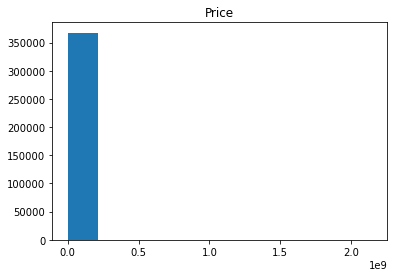

In [23]:
import matplotlib.pyplot as plt
plt.hist(autos['price'])
plt.title("Price")
plt.show()

In [24]:
# Find out max value on price.
autos["price"].max()

2147483647

In [25]:
# Find out min value on price.
autos["price"].min()

0

In [26]:
# Find out mean value on price.
autos["price"].mean()

17423.379826656583

In [27]:
# Find Median price
autos["price"].median()

2950.0

In [28]:
# Filter rows where price < 20K

rows = autos[autos["price"] <= 20000]
len(rows)

350559

In [29]:
# Filter rows where price < 200K

rows = autos[autos["price"] <= 200000]
len(rows)

367424

In [30]:
# Filter rows where price < 100

rows = autos[autos["price"] <= 100]
a = len(rows)
print(a)
prcnt = (a/371528)*100
print(prcnt)

14218
3.826898645593334


In [31]:
# Filter rows where price > 200K

rows = autos[autos["price"] > 200000]
b = len(rows)
print(b)
prcnt = (b/371528)*100
print(prcnt)

170
0.04575698197713228


**Analysis:**

- Out of 371528 cars price of about 350559 concentrated in a just a range 0 to 20K.
- Out of 371528 cars price of about 367424 concentrated in a just a range 0 to 200K.
- As ebay is an auction site, it is possible to have listing with opening bid very low, based on common sense, we assume any price under 100 is too low. The amount of cars with price under 100 is less than 4%, so we will remove these rows. 
- Although it is possible for luxury cars with very high price, we will limit the price within 200000 in our analysis

In [32]:
# Remove the rows with price values under 100 and above 200000
autos=autos[autos['price'].between(100,200000)]
len(autos)


354235

**2. Investigate on 'registration_year' column**

In [33]:
autos['registration_year'].value_counts(ascending=False,normalize=True)

2000    0.063639
1999    0.061366
2005    0.059918
2006    0.055545
2001    0.055099
2003    0.054447
2004    0.053944
2002    0.052431
2007    0.048598
1998    0.047872
2008    0.044465
2009    0.043127
1997    0.038912
2010    0.034127
2011    0.033241
1996    0.028857
2017    0.027897
2012    0.026090
2016    0.025511
1995    0.024560
2013    0.016986
2014    0.013274
1994    0.012867
2018    0.010645
1993    0.009073
1992    0.008043
2015    0.007961
1991    0.007396
1990    0.006798
1989    0.003501
1988    0.002566
1985    0.001874
1987    0.001841
1986    0.001493
1980    0.001403
1983    0.001191
1984    0.001132
1982    0.000889
1979    0.000824
1970    0.000821
1978    0.000819
1981    0.000751
1972    0.000680
1974    0.000553
1973    0.000539
1971    0.000536
1977    0.000522
1976    0.000480
1966    0.000443
1969    0.000426
1975    0.000404
1960    0.000401
1968    0.000401
1967    0.000378
1965    0.000333
1964    0.000215
1963    0.000212
1962    0.000130
1961    0.0001

In [34]:
s = autos['registration_year'].value_counts().sort_index()
print(s.head(15))
s.tail(40)

1000    23
1001     1
1039     1
1111     1
1234     4
1255     1
1300     2
1400     1
1500     3
1600     2
1602     1
1800     4
1910    35
1911     1
1923     3
Name: registration_year, dtype: int64


2014    4702
2015    2820
2016    9037
2017    9882
2018    3771
2019      16
2066       1
2200       1
2222       1
2290       1
2500       2
2800       1
2900       1
3000       4
3200       1
3700       1
3800       1
4000       3
4100       1
4500       2
4800       1
5000      13
5300       1
5555       2
5600       1
5900       1
5911       2
6000       6
6200       1
7000       4
7100       1
7500       1
7777       1
7800       1
8200       1
8500       1
8888       2
9000       4
9450       1
9999      13
Name: registration_year, dtype: int64

**Analysis**

1. Based on normalized data for years we can take 1950 as the lower cut off for registration year
2. Based on value counts for years we can take 2019 as the upper cut off for registration year


In [35]:
autos['registration_year'] = autos['registration_year'].astype(object)

#### Use sort_index() to sort by index and sort_values() to sort by values

In [36]:
# To get an idea of when listing was put up, to check any relation with date registered
autos['ad_created'].str[:4].value_counts().sort_values(ascending=False) 

# Most of listing adds created in year 2016.

2016    354205
2015        29
2014         1
Name: ad_created, dtype: int64

In [37]:
# We only keep records for car registered from 1900-2020

print(len(autos))
autos=autos[autos['registration_year'].between(1900,2020)]
len(autos)

354235


354112

**Analysis:**

- Based on value counts of registration years we select cut off or lower and upper limit for registration year as 1900 and 2020. 

**3. Investigate on 'power_ps' column and do the same analysis and remove the rows with unrealistic values**

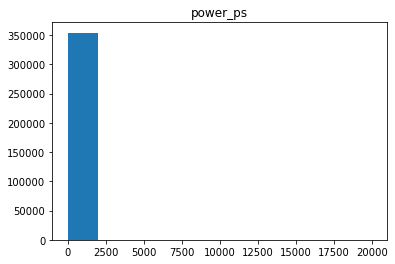

In [38]:
import matplotlib.pyplot as plt
plt.hist(autos['power_ps'])
plt.title("power_ps")
plt.show()

In [39]:
autos['power_ps'].mean()

117.01730808331827

In [40]:
autos['power_ps'].median()

107.0

In [41]:
autos['power_ps'].max()

20000

In [42]:
autos['power_ps'].min()

0

In [43]:
# Find number of records having power_ps > 2000

rcrds = autos[autos['power_ps'] > 2000]
len(rcrds)

113

In [44]:

rcrds = autos[autos['power_ps'] > 500]
len(rcrds)

762

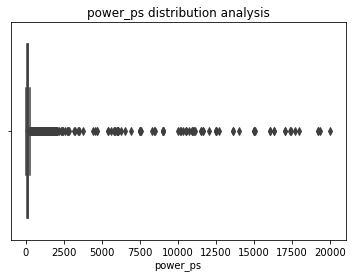

In [45]:
import matplotlib.pyplot as plt
sns.boxplot(x=autos['power_ps'])
plt.title('power_ps distribution analysis')
plt.show()


In [46]:
autos=autos[autos['power_ps'].between(10,500)]

**Analysis**

1. Although power of car is till 20K, however only 113 records out of 350K are > 2000 & 788 > 500. So we limit range b/w 10 and 500 only.

### Step1_ 4 Change the values in the columns ( 1. gearbox, 2. 'unrepaired_damage')  which have only 2 unique values and are not in English 

**1.'gearbox'**

In [47]:
autos.gearbox.value_counts()

manuell      242969
automatik     69486
Name: gearbox, dtype: int64

In [48]:
mapping_dict2={'manuell':'manual', 'automatik':'automatic'}
autos['gearbox']=autos['gearbox'].map(mapping_dict2)
autos['gearbox'].value_counts()

manual       242969
automatic     69486
Name: gearbox, dtype: int64

**2.'unrepaired_damage'**

In [49]:
autos.unrepaired_damage.value_counts()

nein    242351
ja       29318
Name: unrepaired_damage, dtype: int64

In [50]:
mapping_dict4={'nein':'no', 'ja':'yes'}
autos['unrepaired_damage']=autos['unrepaired_damage'].map(mapping_dict4)
autos['unrepaired_damage'].value_counts()

no     242351
yes     29318
Name: unrepaired_damage, dtype: int64

### Step1_ 5 Investigate Null-values

In [51]:
autos.isnull().sum()

name                     0
price                    0
vehicle_type         21117
registration_year        0
gearbox               5965
power_ps                 0
model                12651
kilometer                0
fuel_type            19596
brand                    0
unrepaired_damage    46751
ad_created               0
dtype: int64

In [52]:
autos.describe()    
# Basically price and power_ps was heavily skewed cz of outliers, so we change it to reasonable range,

,price,power_ps,kilometer
count,318420.000000,318420.000000,318420.000000
mean,6161.892877,125.466786,125645.028579
std,8162.133831,59.865037,39172.558765
min,100.000000,10.000000,5000.000000
25%,1400.000000,80.000000,100000.000000
50%,3490.000000,116.000000,150000.000000
75%,7900.000000,150.000000,150000.000000
max,200000.000000,500.000000,150000.000000


In [53]:
# Check our changes
autos.describe(include='object')

,name,vehicle_type,registration_year,gearbox,model,fuel_type,brand,unrepaired_damage,ad_created
count,318420,297303,318420,312455,305769,298824,318420,271669,318420
unique,197688,8,95,2,250,7,40,2,111
top,BMW_318i,limousine,1999,manual,golf,benzin,volkswagen,no,2016-04-03 00:00:00
freq,616,86097,19364,242969,26432,196450,68533,242351,12665


<a id='eda'></a>
## Exploratory Data Analysis

In [54]:
autos.columns

Index(['name', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power_ps', 'model', 'kilometer', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created'],
      dtype='object')

### Visualizations continuous variables

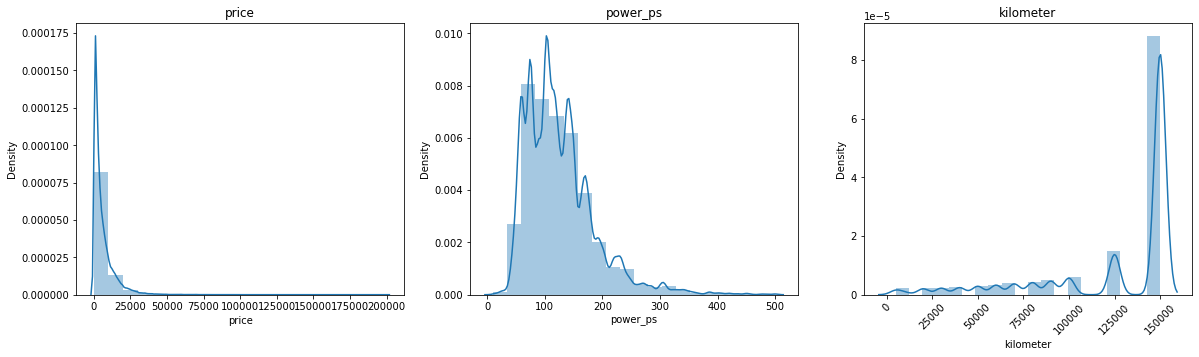

In [55]:
import seaborn as sns
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(20,5))     

sns.distplot(autos['price'], kde=True, bins=20, hist=True, ax=ax[0])
sns.distplot(autos['power_ps'], kde=True, bins=20, hist=True, ax=ax[1])
sns.distplot(autos['kilometer'], kde=True, bins=20, hist=True, ax=ax[2])

plt.xticks(rotation = 45)

ax[0].set_title('price')
ax[1].set_title('power_ps')
ax[2].set_title('kilometer');

### Visualizations discrete variables

In [56]:
v = autos['vehicle_type'].value_counts()
g = autos['gearbox'].value_counts()
f = autos['fuel_type'].value_counts()
b = autos['brand'].value_counts()
u = autos['unrepaired_damage'].value_counts()



limousine     86097
kleinwagen    69215
kombi         60744
bus           27318
cabrio        21141
coupe         16978
suv           13348
andere         2462
Name: vehicle_type, dtype: int64


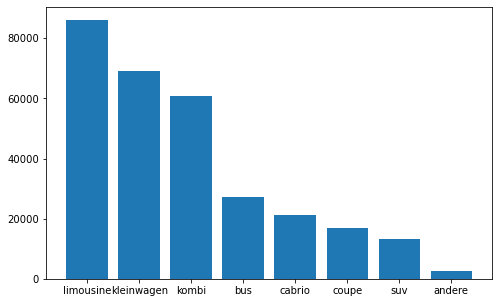

manual       242969
automatic     69486
Name: gearbox, dtype: int64


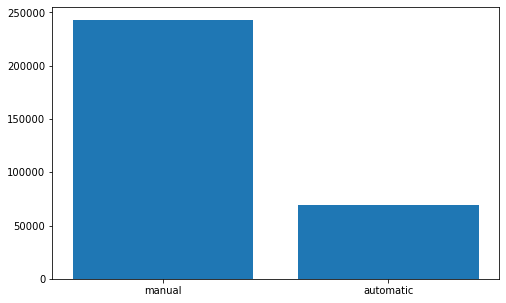

benzin     196450
diesel      96670
lpg          4803
cng           499
hybrid        244
andere         88
elektro        70
Name: fuel_type, dtype: int64


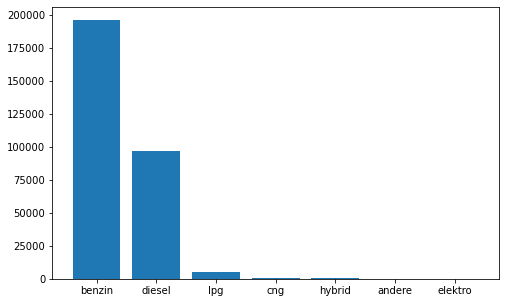

volkswagen        68533
bmw               35753
opel              33553
mercedes_benz     30666
audi              29221
ford              21475
renault           14439
peugeot            9564
fiat               7902
seat               6196
skoda              5149
mazda              4910
smart              4576
citroen            4393
nissan             4218
toyota             4163
hyundai            3220
mini               3206
volvo              2945
mitsubishi         2589
honda              2462
kia                2226
sonstige_autos     2189
alfa_romeo         2034
suzuki             1994
porsche            1934
chevrolet          1549
chrysler           1193
dacia               820
jeep                715
land_rover          679
subaru              667
daihatsu            625
jaguar              527
saab                484
daewoo              420
lancia              402
rover               378
trabant             293
lada                158
Name: brand, dtype: int64


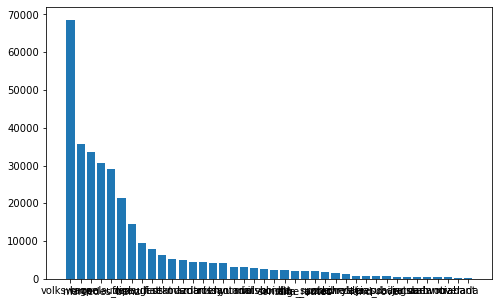

no     242351
yes     29318
Name: unrepaired_damage, dtype: int64


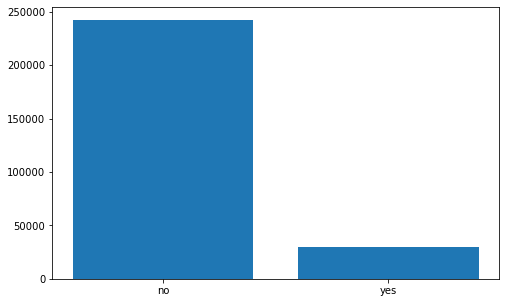

In [57]:
cat_var = [v,g,f,b,u]

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

for i in cat_var:
    print(i)
    plt.figure(figsize=(8, 5))
    plt.bar(i.index,i.values)
    plt.show();

## Question 1: What are the common brands of vehicles in Germany and their average price ?

### Method 1

In [58]:
autos.head()

,name,price,vehicle_type,registration_year,gearbox,power_ps,model,kilometer,fuel_type,brand,unrepaired_damage,ad_created
1,A5_Sportback_2.7_Tdi,18300,coupe,2011,manual,190,NaN,125000,diesel,audi,yes,2016-03-24 00:00:00
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2004,automatic,163,grand,125000,diesel,jeep,NaN,2016-03-14 00:00:00
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2001,manual,75,golf,150000,benzin,volkswagen,no,2016-03-17 00:00:00
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2008,manual,69,fabia,90000,diesel,skoda,no,2016-03-31 00:00:00
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1995,manual,102,3er,150000,benzin,bmw,yes,2016-04-04 00:00:00


In [59]:
br = autos['brand'].value_counts(normalize=True).head(10)
br

volkswagen       0.215228
bmw              0.112283
opel             0.105373
mercedes_benz    0.096307
audi             0.091769
ford             0.067442
renault          0.045346
peugeot          0.030036
fiat             0.024816
seat             0.019459
Name: brand, dtype: float64

Select brands which have more than 5% market share as the most common brands

In [60]:
top_brands = br[br > 0.05]
top_brands

volkswagen       0.215228
bmw              0.112283
opel             0.105373
mercedes_benz    0.096307
audi             0.091769
ford             0.067442
Name: brand, dtype: float64

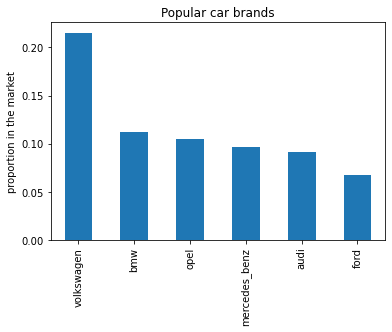

In [61]:
top_brands.plot(kind='bar', title='Popular car brands')
plt.ylabel('proportion in the market');


**Analysis**
>- Volkswagen is the most polular choice, counting more than 20% of the market
>- BMW, Opel, mercedes_benz and audi are the next popular one, but far from volkswagen's popularity

In [62]:
top_brands.index

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'], dtype='object')

In [63]:
brand_m_prices_dict = {}   # empty dictionary

for brand in top_brands.index:
    one_brand_data = autos[autos["brand"] == brand]
    mean_price = one_brand_data["price"].mean()
    brand_m_prices_dict[brand] = int(mean_price)     # add item in dict as ---> my_dict5['address'] = "Cantt"

brand_m_prices_dict

{'volkswagen': 5617,
 'bmw': 8601,
 'opel': 3150,
 'mercedes_benz': 8605,
 'audi': 9273,
 'ford': 3913}

In [64]:
brand_m_prices_dict.keys()

dict_keys(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'])

In [65]:
brand_m_prices_dict.values()

dict_values([5617, 8601, 3150, 8605, 9273, 3913])

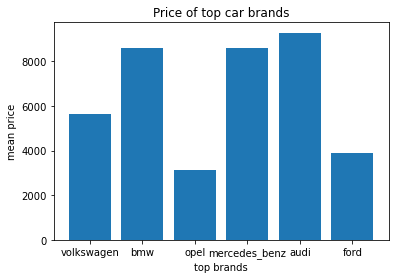

In [66]:
plt.bar(brand_m_prices_dict.keys(), brand_m_prices_dict.values())
plt.xlabel('top brands')
plt.ylabel('mean price')
plt.title('Price of top car brands');

For sorted values-
1. either convert dict to series & sort
2. directly sort a doctionary

In [67]:
# For sorted vales, first convert dict to series
mean_prices = pd.Series(brand_mean_prices).sort_values(ascending=False)
mean_prices

NameError: name 'brand_mean_prices' is not defined

In [ ]:
mean_prices.index

In [ ]:
mean_prices.values

In [ ]:
plt.bar(mean_prices.index, mean_prices.values)
plt.xlabel('top brands')
plt.ylabel('mean price')
plt.title('Price of top car brands');

### Answer 1:###  

>- Among these popular brands, Audi is the most expensive, average price is 9381 dollars, followed by 8680 for BMW and 8664 for Mercedes. Volkswagen is more affordable ofr most people, average price is 5688. Ford and Opel are least expensive with average price under 4000.

### Question 2: Among common brands,  are there large differences on kilometer that can affect listing price?

In [ ]:
top_brands

In [ ]:
km_dict = {}

for i in top_brands.index:
    one_brand_data = autos[autos['brand'] == i]
    km = one_brand_data['kilometer'].mean()
    # add into dictionary values
    km_dict[i] = int(km)
print(km_dict)

sorted_dict = {k: v for k, v in sorted(km_dict.items(), key=lambda item: item[1])}
sorted_dict

In [ ]:
# plot on sorted dictionary
plt.bar(sorted_dict.keys(), sorted_dict.values())
plt.xlabel('top brands')
plt.ylabel('avg km')
plt.title('Avg km top car brands');

### Answer 2:###

- Among these common brands of cars on sale, the average of odometers are all ablove 100000km. The range of car mileages does not vary as much as the prices do by brand.

### Question 3: What are the factors that affect car price?
Visualizatins used-
1. Numerical columns - Correlation plot and scatterplot
2. Categorical columns - bar chart   (use groupby to access each categorical variable w.r.t price)

### Q3_Step1: First we will analyze using correlation heatmap (only numerical columns can be analysed in correlation plot) & check how they are correlated with the car price. Also check scatter chart.

In [ ]:
# plot correlation heatmap
sns.heatmap(autos.corr(),annot=True,cmap='coolwarm');

**Analysis**
>- Prices are positively correlated with power_ps and registration_year. Power_ps has stronger correlation.
>- Prices are negatively correlated with kilometer

In [ ]:
# plot scatter chart to check the relation between 'registration_year' and 'price'
autos.plot(kind='scatter', x='registration_year', y='price');

**Analysis**
>- In general, the newer the cars, the higher the prices, but for a given registration year, there are still huge gap on prices

In [ ]:
# plot scatter chart to check the relation between 'power_ps' and 'price'
autos.plot(kind='scatter', x='power_ps', y='price');

**Analysis**

1. Most cars have pow_ps under 400
2. In general the higher the power_ps, the higher the price
3. there are cars with extremely high power_ps, but prices range is still very large. 

### Q3_Step2: We will analyze the columns with catergorical string values using bar chart.

**1.'vehicle_type'**

In [ ]:
vtype_price=autos.groupby('vehicle_type')['price'].mean()
vtype_price.sort_values().plot(kind='bar')

plt.ylabel('price');

**Analyze**
>- As we can see, suv is the most expensive ones, and kleinwagen the lease expensive. 

**2.'gearbox'**

In [ ]:
# Analyze whether the damege is repaired can positively influnce the price
gearbox_price=autos.groupby('gearbox')['price'].mean()
gearbox_price.sort_values().plot(kind='bar')

plt.ylabel('price');

**Analysis**
>- In general, automatic cars are more expensive

**3.'fuel_type'**

In [ ]:
fuel_price=autos.groupby('fuel_type')['price'].mean()
fuel_price.sort_values().plot(kind='bar')

plt.ylabel('price');

**Analysis**

>- hybrid are most expensive one and tightlt followed by elektro, diesel and benzin.

**4.'unrepaired_damage'**

In [ ]:
# Analyze whether the damege is repaired can positively influnce the price
unrepaired_price=autos.groupby('unrepaired_damage')['price'].mean()
unrepaired_price.sort_values().plot(kind='bar')

plt.ylabel('price');

**Analysis**

>- In general, when the demage is repaired, the car prices are higher

**5.'brand'**

- If u need top 20 brands then ascending parameter in sorting is important. When you use head(20) you will get top ones only if they are sorted from high to low.

In [ ]:
top_20_expensive=autos.groupby('brand')['price'].mean()

top_20_expensive.sort_values(ascending=False).head(20).plot(kind='bar',title='Top 20 expensive brands', figsize=(10, 5));   # ascending=False to get top 20 values



**Analysis**
>- Porsche is the most expensive brand, the average price double the following competitor 'land_rover'. 
>- The top 6 most expensive brands are all not the most common brands. The most popular brand volkswagen has very affordable average price.

### Q3_Step4: Let's analyze the most popular brand 'volkswagen', and see how car model and car name length can affect prices

In [ ]:
# Selet the rows that are volkswagen for analyze
volkswagen=autos[autos['brand']=='volkswagen']
print(len(volkswagen))
volkswagen.head()


In [ ]:
volkswagen.describe(include='all')

**Analyse Models w.r.t most popular brand volkswagen**

In [ ]:
m = volkswagen['model'].value_counts().sort_values(ascending=False)                            

Using pandas inbuilt function to plot (plotting series here)

In [ ]:
# Most common model under brand volkswagen

m.plot(kind='bar', figsize=(10,5), title=('Models most sold for Volkswagen'));

**Analysis**

- There are huge gap on number of different car model sold. 
- For volkswagen, amorok is the most expensive ones however least sold brand.
- Golf is most sold and cheaper model.


In [ ]:
p = volkswagen.groupby('model')['price'].mean()
p.sort_values(ascending=False).plot(kind='bar', figsize=(10,5), title=('Prices range for car models for Volkswagen'));


**Analysis**

>- There are huge price gap on different car model. For volkswagen, amorok is the most expensive ones, and lupo the least expensive one.



**Analyse Models w.r.t name length for most popular brand volkswagen**

In [ ]:
# Add a new columns for the name length
volkswagen['name_length']=volkswagen['name'].apply(len)


In [ ]:
volkswagen[['price','name_length']].corr()

In [ ]:
volkswagen.head(2)

**Analysis**
>- name_lenth is positively correlated with price, as the longer the name is, the more features are added, so the price is higher, but the correlation is not strong.

### Answer 3: 
> - From the correlation heatmap and scatter chart, we can conclude `price` are positively correlated with `power_ps` and `registration_year` and are negatively correlated with `kilometer` in general, and `power_ps` is has stronger influence.
> - The other strong catagorical factors that affect the car price are the brand and whether the damage is repaired or not; Also automic are much mroe expensive than manual
> - vehicle_type and fuel_type have strong effects too
> - By analyzing data for volkswagen which is the most common brand in Germany, we can see the above conclusions are consistent for specific car brand. And for the same brand, different models have high price ranges too.